## 기본적인 gym의 mountain car 동작

In [171]:
#https://davinci-ai.tistory.com/33 참조하였습니다.

import gym
import tensorflow as tf
import random
import numpy as np

env = gym.make('MountainCar-v0')   # env = gym에서 제공하는 환경으로, 언덕이며 왼쪽과 오른쪽을 반복하여 가속도를 만들어야 오를 수 있음.
print(env.observation_space) # 관찰공간으로, agent가 환경을 볼 수 있는 범위이다.


Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


In [172]:
print(env.observation_space.low) # x축 좌표의 최솟값, 최소 속도
print(env.observation_space)

[-1.2  -0.07]
Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


In [173]:
print(env.observation_space.high) # x축 좌표의 최댓값, 최대 속도

[0.6  0.07]


In [174]:
print(env._max_episode_steps)

200


In [175]:
print(env.action_space) # agent가 할 수 있는 행동의 경우의 수, discrete는 이산적, 정수로 나눌수 있음을 뜻한다.
# agent : car, action : left, stop, right이고,  reward는 200이하의 step에서 time step마다 -1, 깃발(x축 0.5지점)에 도착하는 것(종료 조건, 최대 보상 조건)이 목표임

Discrete(3)


In [176]:
env = gym.make('MountainCar-v0') # 환경 생성
env.reset() # 환경 초기화, 안해주면 render 되지 않음


action = env.action_space.sample() # 랜덤한 액션 수행, 0,1,2중 하나 랜덤으로 리턴.
print(action) # 액션
print(env.step(action)) # 수행 결과. 환경, 보상, ep 종료여부

env.render() # 실행결과 화면으로 출력
env.close() # 안해주면 render에서 멈춤
## 여기까지가 기본적인 명령어

1
(array([-5.33756116e-01,  7.67435740e-05]), -1.0, False, {})


## ep의 수행

In [177]:
env = gym.make('MountainCar-v0') # 환경 생성
env.reset() # 환경 초기화, 안해주면 render 되지 않음
state = 0 # state 변수
score = 0
suc = False
while True: 
    action = env.action_space.sample() 
    obs, reward, done, info = env.step(action) 
    print(obs)
    score = score + reward 
    state = state + 1 
    if done: 
        break
    env.render()
env.close() # 안해주면 render에서 멈춤
if score > -200:
    suc = True
print(score)
print(state)
print(suc)

[-0.48274232 -0.00131545]
[-0.48536342 -0.0026211 ]
[-0.48827066 -0.00290724]
[-0.49144237 -0.0031717 ]
[-0.49385487 -0.0024125 ]
[-0.49649016 -0.00263529]
[-0.49932854 -0.00283838]
[-0.50134878 -0.00202024]
[-0.50453577 -0.00318699]
[-0.50886566 -0.00432989]
[-0.51430602 -0.00544035]
[-0.51981605 -0.00551004]
[-0.52435446 -0.00453841]
[-0.5288872  -0.00453274]
[-0.53338028 -0.00449308]
[-0.53780001 -0.00441973]
[-0.54111326 -0.00331325]
[-0.54329522 -0.00218195]
[-0.54532953 -0.00203432]
[-0.54720098 -0.00187145]
[-0.54889556 -0.00169458]
[-5.49400602e-01 -5.05037974e-04]
[-5.49712319e-01 -3.11717464e-04]
[-0.54882839  0.00088393]
[-0.54775541  0.00107298]
[-0.54550142  0.00225399]
[-0.54408328  0.00141814]
[-0.5415116   0.00257168]
[-0.53980563  0.00170596]
[-0.53697817  0.00282747]
[-0.53305038  0.00392778]
[-0.53005172  0.00299866]
[-0.52800467  0.00204706]
[-0.52492457  0.0030801 ]
[-0.52183453  0.00309004]
[-0.51875772  0.00307681]
[-0.51571721  0.0030405 ]
[-0.51373582  0.001981

## 반복으로 랜덤한 act를 수행

In [178]:
env = gym.make('MountainCar-v0') 
env.reset() # 환경 초기화

scores = []
train_data = [] 
apt_scores = [] 
# req_state = 200 # 일정 횟수, 200번 내로 성공한 경우 즉, 성공한 경우만 기록해야하므로 적당한 값을 준다.
req_score = -198
for i in range(50000): 
    env.reset() 
    score = 0 
#     state = 0
    result = [] 
    previous_obs = [] 
    
    while True: 
        action = env.action_space.sample()         
        obs, reward, done, info = env.step(action) 
        if len(pre_obs) > 0: 
            result.append([pre_obs, action]) 
        pre_obs = obs 
        if obs[0] > -0.2: # x 좌표에 따라 리워드를 준다.
            reward = 1 
        score = score + reward
#         state = state + 1
        if done: 
            break 
#         env.render() # 실행결과 화면으로 출력
    scores.append(score) 
    if score > req_score: 
        apt_scores.append(score) 
        
        for data in result: 
            train_data.append(data) 
            

env.close() # 안해주면 render에서 멈춤

print('all of scores mean', np.mean(scores)) 
print('req scores', len(apt_scores)) 
print('mean of req scores', np.mean(apt_scores))


all of scores mean -199.91452
req scores 232
mean of req scores -181.64655172413794


## Train

In [179]:
train_X = np.array([i[0] for i in train_data]).reshape(-1, 2) # 상태를 X
train_Y = np.array([i[1] for i in train_data]).reshape(-1, 1) # 그에 따른 행동을 Y
print(train_X.shape)
print(train_Y.shape)

(46400, 2)
(46400, 1)


In [180]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(3, activation='softmax') 
]) 

In [181]:
model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
) 
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5) 
history = model.fit(train_X, train_Y, epochs=30, callbacks=[callback], batch_size=32, validation_split=0.25)



Epoch 1/30
1088/1088 [==============================] - 1s 897us/step - loss: 1.0982 - accuracy: 0.3435 - val_loss: 1.0929 - val_accuracy: 0.3909
Epoch 2/30
1088/1088 [==============================] - 1s 817us/step - loss: 1.0904 - accuracy: 0.3927 - val_loss: 1.0878 - val_accuracy: 0.3925
Epoch 3/30
1088/1088 [==============================] - 1s 827us/step - loss: 1.0856 - accuracy: 0.4039 - val_loss: 1.0861 - val_accuracy: 0.3966
Epoch 4/30
1088/1088 [==============================] - 1s 849us/step - loss: 1.0855 - accuracy: 0.4029 - val_loss: 1.0860 - val_accuracy: 0.3970
Epoch 5/30
1088/1088 [==============================] - 1s 788us/step - loss: 1.0860 - accuracy: 0.3988 - val_loss: 1.0844 - val_accuracy: 0.3969
Epoch 6/30
1088/1088 [==============================] - 1s 873us/step - loss: 1.0846 - accuracy: 0.4029 - val_loss: 1.0846 - val_accuracy: 0.3966
Epoch 7/30
1088/1088 [==============================] - 1s 865us/step - loss: 1.0847 - accuracy: 0.4036 - val_loss: 1.0829 -

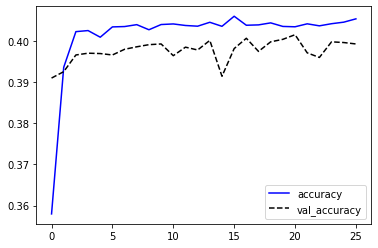

In [182]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'], 'b-', label='accuracy') 
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy') 
plt.legend() 
plt.show()

In [183]:

env.close()
env.reset()
score = 0 
state = 0 
previous_obs = [] 
while True: 
    if len(previous_obs) == 0: 
        action = env.action_space.sample() 
    else: 
        logit = model.predict(np.expand_dims(previous_obs, axis=0))[0] 
        action = np.argmax(logit) 
    obs, reward, done, _ = env.step(action) 
    previous_obs = obs 
    score = reward + score 
    state = state + 1
    env.render()
    if done: 
        break 
        
print('score', score) 
print('state', state) 
env.close()



score -126.0
state 126
